In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from underthesea import word_tokenize, pos_tag, sent_tokenize
import re
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Sendo_reviews.csv')

In [3]:
df.head()

,product_id,customer_id,full_name,created_time,rating,content
0,10119100,trang,trang,09:27 | 08/05/2021,5,NaN
1,10119100,NguyenCatTuong,Nguyễn Cát Tường,20:22 | 21/12/2018,4,Shop phục vụ khá tốt.
2,10119100,VuPhuong,Vũ Phương,15:00 | 10/12/2018,3,Sản phẩm gần giống mô tả
3,10119490,hoangthisuong,hoàng thị sương,22:43 | 06/03/2022,5,NaN
4,10119490,DAITRANG,ĐÀI TRANG,12:22 | 02/12/2021,5,NaN


In [4]:
df.tail()

,product_id,customer_id,full_name,created_time,rating,content
7219,25113665,thuythanh,thuy thanh,21:03 | 23/02/2020,4,NaN
7220,25113665,thuythanh,thuy thanh,21:03 | 23/02/2020,4,NaN
7221,25113665,thuythanh,thuy thanh,21:03 | 23/02/2020,4,NaN
7222,25113665,tranthingoclien,tranthingoclien,04:53 | 23/02/2020,4,NaN
7223,25178191,HienNguyen,Hiền Nguyễn,15:59 | 05/06/2021,5,Đẹp như mô tả.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7224 entries, 0 to 7223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    7224 non-null   int64 
 1   customer_id   7224 non-null   object
 2   full_name     7224 non-null   object
 3   created_time  7224 non-null   object
 4   rating        7224 non-null   int64 
 5   content       5308 non-null   object
dtypes: int64(2), object(4)
memory usage: 338.8+ KB


In [6]:
df.describe()

,product_id,rating
count,7.224000e+03,7224.000000
mean,2.648703e+07,4.633306
std,2.231223e+07,0.936709
min,7.639470e+05,1.000000
25%,1.671025e+07,5.000000
50%,2.131687e+07,5.000000
75%,2.567132e+07,5.000000
max,1.150735e+08,5.000000


In [7]:
df.shape

(7224, 6)

In [8]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Check null rows
df.isnull().sum()

product_id         0
customer_id        0
full_name          0
created_time       0
rating             0
content         1916
dtype: int64

In [14]:
# Remove null rows
df = df.dropna()

In [15]:
# Check duplicates
df.duplicated().sum()

40

In [16]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(5268, 6)

- The dataset includes 7,224 rows, with 1,916 null entries in the content column and 40 duplicate rows. 
- We remove these null and duplicate data lines.

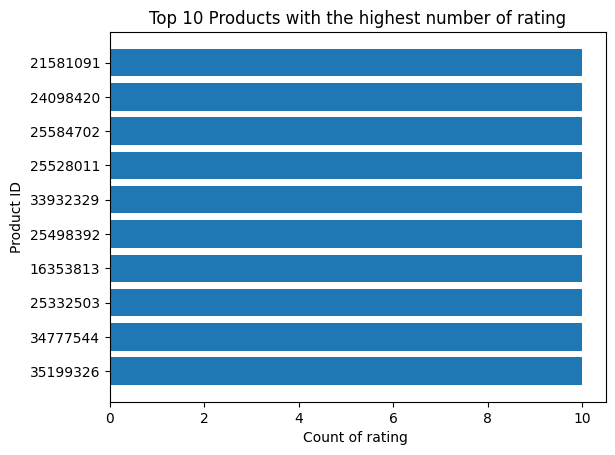

In [18]:
result = df.groupby('product_id')['rating'].count().sort_values(ascending=False).head(10)
result = result.iloc[::-1]
result.index = result.index.map(str)

plt.barh(result.index, result.values)
plt.xlabel('Count of rating ')
plt.ylabel('Product ID')
plt.title('Top 10 Products with the highest number of rating')
plt.show()

The products with the most reviews are 10, no product has too many reviews.

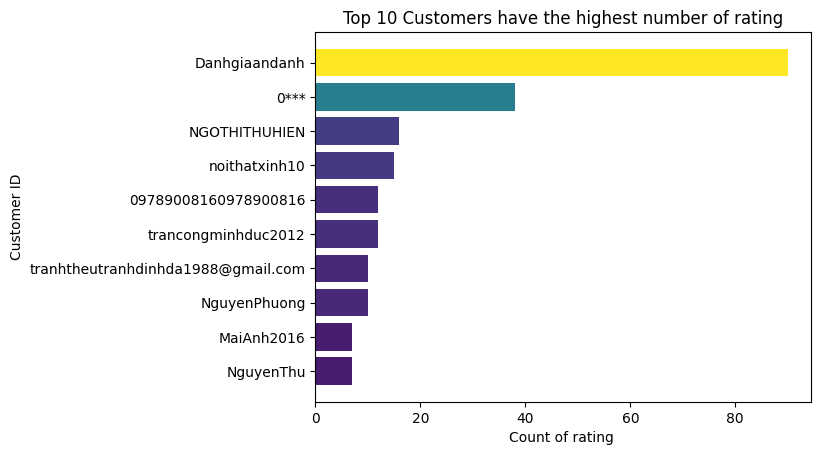

In [19]:
result = df.groupby('customer_id')['rating'].count().sort_values(ascending=False).head(10)
result = result.iloc[::-1]
result.index = result.index.map(str)

# Create a color palette for the bars
colors = plt.cm.viridis(result.values / max(result.values))

# Create a bar chart
plt.barh(result.index, result.values, color=colors)

plt.xlabel('Count of rating ')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers have the highest number of rating')
plt.show()

Only one customer wrote over 80 reviews, and another customer wrote more than 40 reviews. All other customers wrote fewer than 20 reviews.

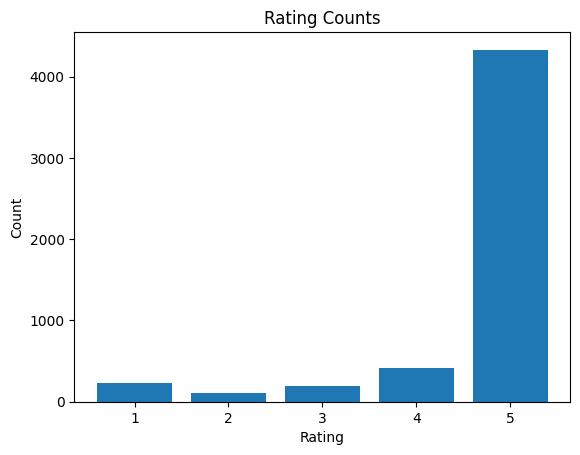

In [20]:
rating_counts = df.groupby('rating')['rating'].count()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.show()

The data is imbalanced, there are more than 4,000 5-star ratings, while the other stars have less than 500 ratings each.

In [21]:
# LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
# LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
# LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
#################
# LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()
# LOAD POSITIVE WORDS
file = open('files/positive_words.txt', 'r', encoding="utf8")
positive_lst = file.read().split('\n')
file.close()
# LOAD NEGATIVE WORDS
file = open('files/negative_words.txt', 'r', encoding="utf8")
negative_lst = file.read().split('\n')
file.close()

In [22]:
def process_text(text):
    document = text.lower()
    document = re.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        # CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        # TRANSLATE English -> Vietnamese
        sentence = ' '.join(english_dict[word] if word in english_dict else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence

    document = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',document)
    document = re.sub(r'[\r\n]+', ' ', document)
    document = re.sub('[^\w\s]', ' ', document)
    document = re.sub('[\s]{2,}', ' ', document)
    document = re.sub('^[\s]{1,}', '', document)
    document = re.sub('[\s]{1,}$', '', document)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’'
    for char in punctuation:
        document = document.replace(char, ' ')

    return document

In [23]:
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

In [24]:
def covert_unicode(txt):
    dicchar = loaddicchar()
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [25]:
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [26]:
def remove_stopword(text):
    document = ' '.join('' if word in stopwords_lst else word for word in text.split())
    return document

In [27]:
def text_preprocessing(text):
    text = process_text(text)
    text = covert_unicode(text)
    text = process_special_word(text)
    text = word_tokenize(text, format="text")
    text = remove_stopword(text)
    return text

In [28]:
df['new_content'] = df['content'].apply(text_preprocessing)

In [29]:
df[['content', 'new_content']]

,content,new_content
1,Shop phục vụ khá tốt.,cửa tiệm phục_vụ tốt
2,Sản phẩm gần giống mô tả,sản_phẩm
5,Giao hàng nhanh bất ngờ.,giao hàng nhanh_chóng
6,Sản phẩm/dịch vụ giống mô tả.,sản_phẩm dịch_vụ
7,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...
...,...,...
7212,"Chuyên nghiệp, thân thiện. Đẹp như mô tả. Đóng...",chuyên_nghiệp thân_thiện đẹp đóng_gói kỹ_lưỡ...
7213,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...
7214,Đẹp như mô tả.,đẹp
7217,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...


In [48]:
p_icon = [
    "😄", "😃", "😀", "😁", "😆",
    "😅", "🤣", "😂", "🙂", "🙃",
    "😉", "😊", "😇", "🥰", "😍",
    "🤩", "😘", "😗", "😚", "😙",
    "😋", "😛", "😜", "🤪", "😝",
    "🤗", "🤭", "🥳", "😌", "😎",
    "🤓", "🧐", "👍", "🤝", "🙌", "👏", "👋",
    "🤙", "✋", "🖐️", "👌", "🤞",
    "✌️", "🤟", "👈", "👉", "👆",
    "👇", "☝️"
]

In [49]:
n_icon = [
    "😞", "😔", "🙁", "☹️", "😕",
    "😢", "😭", "😖", "😣", "😩",
    "😠", "😡", "🤬", "😤", "😰",
    "😨", "😱", "😪", "😓", "🥺",
    "😒", "🙄", "😑", "😬", "😶",
    "🤯", "😳", "🤢", "🤮", "🤕",
    "🥴", "🤔", "😷", "🙅‍♂️", "🙅‍♀️",
    "🙆‍♂️", "🙆‍♀️", "🙇‍♂️", "🙇‍♀️", "🤦‍♂️",
    "🤦‍♀️", "🤷‍♂️", "🤷‍♀️", "🤢", "🤧",
    "🤨", "🤫", "👎", "👊", "✊", "🤛", "🤜",
    "🤚", "🖕"
]

In [50]:
def count_positive(text):
    text = text.lower()
    punctuation = ',.’'
    for char in punctuation:
        text = text.replace(char, ' ')
    new_sentence =''
    for sentence in sent_tokenize(text):
        # CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence

    positive_word = sum(1 for word in positive_lst if word in document)
    positive_icon = sum(1 for i in p_icon if i in document)

    return positive_word + positive_icon

In [51]:
def count_negative(text):
    text = text.lower()
    punctuation = ',.’'
    for char in punctuation:
        text = text.replace(char, ' ')
    new_sentence =''
    for sentence in sent_tokenize(text):
        # CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence

    negative_word = sum(1 for word in negative_lst if word in document)
    negative_icon = sum(1 for i in n_icon if i in document)

    return negative_word + negative_icon

In [52]:
df['count_positive'] = df['content'].apply(count_positive)
df['count_negative'] = df['content'].apply(count_negative)

In [53]:
df[['rating','content','new_content','count_positive', 'count_negative']]

,rating,content,new_content,count_positive,count_negative
1,4,Shop phục vụ khá tốt.,cửa tiệm phục_vụ tốt,2,0
2,3,Sản phẩm gần giống mô tả,sản_phẩm,1,0
5,5,Giao hàng nhanh bất ngờ.,giao hàng nhanh_chóng,2,0
6,4,Sản phẩm/dịch vụ giống mô tả.,sản_phẩm dịch_vụ,1,1
7,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2
...,...,...,...,...,...
7212,5,"Chuyên nghiệp, thân thiện. Đẹp như mô tả. Đóng...",chuyên_nghiệp thân_thiện đẹp đóng_gói kỹ_lưỡ...,12,1
7213,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2
7214,5,Đẹp như mô tả.,đẹp,1,1
7217,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2


In [36]:
df['output'] = np.where(df['rating'] >= 4, 'Positive', np.where(df['rating'] <= 2, 'Negative', 'Neutral'))

In [37]:
df.head()

,product_id,customer_id,full_name,created_time,rating,content,new_content,count_positive,count_negative,output
1,10119100,NguyenCatTuong,Nguyễn Cát Tường,20:22 | 21/12/2018,4,Shop phục vụ khá tốt.,cửa tiệm phục_vụ tốt,2,0,Positive
2,10119100,VuPhuong,Vũ Phương,15:00 | 10/12/2018,3,Sản phẩm gần giống mô tả,sản_phẩm,1,0,Neutral
5,10119490,lienla,liên la,16:43 | 06/02/2021,5,Giao hàng nhanh bất ngờ.,giao hàng nhanh_chóng,2,0,Positive
6,10119490,DoanHanh,Đoàn Hạnh,22:06 | 19/07/2020,4,Sản phẩm/dịch vụ giống mô tả.,sản_phẩm dịch_vụ,1,1,Positive
7,10119490,Phamthuhoai,Phạm thu hoài,11:57 | 26/08/2019,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2,Positive


In [38]:
df = df[df['new_content']!='']
df = df[df['new_content']!=' ']

In [39]:
df['output'].value_counts()

Positive    4717
Negative     337
Neutral      180
Name: output, dtype: int64

In [40]:
df.to_csv("df_clean.csv")

In [41]:
test = pd.read_csv("df_clean.csv",index_col=0)
test

,product_id,customer_id,full_name,created_time,rating,content,new_content,count_positive,count_negative,output
1,10119100,NguyenCatTuong,Nguyễn Cát Tường,20:22 | 21/12/2018,4,Shop phục vụ khá tốt.,cửa tiệm phục_vụ tốt,2,0,Positive
2,10119100,VuPhuong,Vũ Phương,15:00 | 10/12/2018,3,Sản phẩm gần giống mô tả,sản_phẩm,1,0,Neutral
5,10119490,lienla,liên la,16:43 | 06/02/2021,5,Giao hàng nhanh bất ngờ.,giao hàng nhanh_chóng,2,0,Positive
6,10119490,DoanHanh,Đoàn Hạnh,22:06 | 19/07/2020,4,Sản phẩm/dịch vụ giống mô tả.,sản_phẩm dịch_vụ,1,1,Positive
7,10119490,Phamthuhoai,Phạm thu hoài,11:57 | 26/08/2019,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2,Positive
...,...,...,...,...,...,...,...,...,...,...
7212,25103757,NguyenThiThanhBinh,Nguyễn Thị Thanh Bình,09:01 | 07/08/2020,5,"Chuyên nghiệp, thân thiện. Đẹp như mô tả. Đóng...",chuyên_nghiệp thân_thiện đẹp đóng_gói kỹ_lưỡ...,12,1,Positive
7213,25113665,tientranthicam,tien tran thi cam,10:43 | 19/02/2020,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2,Positive
7214,25113665,ngovan,ngo van,09:20 | 30/03/2021,5,Đẹp như mô tả.,đẹp,1,1,Positive
7217,25113665,oanhphung,oanh phung,09:23 | 25/02/2020,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2,Positive


### Conclusion:
- The Sendo_review dataset initially includes 7,224 rows, with 1,916 null entries in the content column and 40 duplicate rows. After processing the text data in the content column to create new_content, count_positive, and count_negative columns, the new dataset is saved as a CSV file with 5,234 rows and 10 columns for reuse.